In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame([1,2,3])
df

,0
0,1
1,2
2,3


In [4]:
import pandas as pd
dfProductionMetric = pd.read_csv("ProductionMetric.csv")

In [5]:
dfProductionMetric[['unplanned_stop_time', 'deviceKey']].groupby('deviceKey').agg('mean')

,unplanned_stop_time
deviceKey,
Line1,51.576421
Line2,49.172053
Line3,41.300305
Line4,49.006807


In [6]:
dfProductionMetric[['unplanned_stop_time', 'planned_stop_time', 'deviceKey']].groupby('deviceKey').get_group('Line3')

,unplanned_stop_time,planned_stop_time,deviceKey
0,185.300072,0.0,Line3
1,0.000000,0.0,Line3
5,0.000000,0.0,Line3
8,0.000000,0.0,Line3
10,175.469759,0.0,Line3
...,...,...,...
9995,185.919232,0.0,Line3
9996,0.000000,0.0,Line3
9997,169.602517,0.0,Line3
9998,0.000000,0.0,Line3


In [7]:
import numpy as np
dfProductionMetric[['unplanned_stop_time', 'planned_stop_time', 'deviceKey']].groupby('deviceKey').agg('mean')

,unplanned_stop_time,planned_stop_time
deviceKey,,
Line1,51.576421,16.732938
Line2,49.172053,15.078125
Line3,41.300305,13.842797
Line4,49.006807,14.394469


In [8]:
stop_times = dfProductionMetric[['unplanned_stop_time', 'planned_stop_time']].sum()
proportion = stop_times/stop_times.sum()
proportion

unplanned_stop_time    0.759858
planned_stop_time      0.240142
dtype: float64

In [9]:
dfProductionMetric[['unplanned_stop_time', 'planned_stop_time', 'deviceKey']].groupby('deviceKey').agg('median')

,unplanned_stop_time,planned_stop_time
deviceKey,,
Line1,0.0,0.0
Line2,0.0,0.0
Line3,0.0,0.0
Line4,0.0,0.0


In [10]:
dfProductionMetric[['unplanned_stop_time', 'planned_stop_time', 'deviceKey']].groupby('deviceKey').agg('std')

,unplanned_stop_time,planned_stop_time
deviceKey,,
Line1,89.929091,79.987160
Line2,84.251790,74.095999
Line3,78.060467,67.710112
Line4,81.677030,70.585941


In [11]:
dfProductionMetric[['unplanned_stop_time', 'planned_stop_time', 'deviceKey']].groupby('deviceKey').agg('min')

,unplanned_stop_time,planned_stop_time
deviceKey,,
Line1,0.0,0.0
Line2,0.0,0.0
Line3,0.0,0.0
Line4,0.0,0.0


In [12]:
dfProductionMetric[['unplanned_stop_time', 'planned_stop_time', 'deviceKey']].groupby('deviceKey').agg('max')

,unplanned_stop_time,planned_stop_time
deviceKey,,
Line1,640.208119,951.0
Line2,809.164892,709.0
Line3,439.728239,612.0
Line4,468.443734,630.0


In [13]:
dfProductionMetric[['unplanned_stop_time', 'process_state_reason_display_name']]

,unplanned_stop_time,process_state_reason_display_name
0,185.300072,Security Alarm
1,0.000000,Running Normally
2,0.000000,Lunch
3,0.000000,Lunch
4,0.000000,Lunch
...,...,...
9995,185.919232,No Bottles
9996,0.000000,Running Normally
9997,169.602517,Random Inspection
9998,0.000000,Running Normally


Text(0, 0.5, 'Frequency')

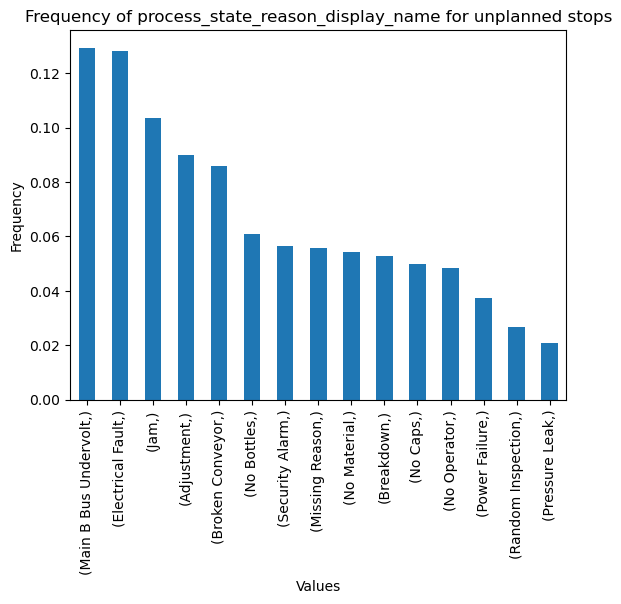

In [14]:
import matplotlib.pyplot as plt
(dfProductionMetric[dfProductionMetric.unplanned_stop_time > 0][['process_state_reason_display_name']].value_counts()/dfProductionMetric[dfProductionMetric.unplanned_stop_time > 0].shape[0]).plot(kind='bar')
plt.title('Frequency of process_state_reason_display_name for unplanned stops')
plt.xlabel('Values')
plt.ylabel('Frequency')


In [15]:
dfProductionMetric[dfProductionMetric.unplanned_stop_time > 0].shape

(3232, 18)

In [16]:
dfProductionMetric[dfProductionMetric.unplanned_stop_time > 0][['process_state_reason_display_name']]

,process_state_reason_display_name
0,Security Alarm
6,Electrical Fault
9,Electrical Fault
10,Jam
14,No Bottles
...,...
9991,No Operator
9992,Broken Conveyor
9993,Adjustment
9995,No Bottles


In [17]:
dfQuality = pd.read_csv("Quality.csv")

In [18]:
dfQuality

,quality_stream_key,deviceKey,count,reject_reason_display_name,prodmetric_stream_key
0,1771948,Line 4,6,Detected by Max WIP,5468380
1,1772152,Line 4,11,Reject,5468383
2,1772153,Line 4,9,Detected by Max WIP,5468383
3,1772154,Line 4,11,Detected by Max WIP,5468386
4,1772155,Line 4,9,Reject,5468386
...,...,...,...,...,...
7165,1827594,Line 3,7,Detected by Max WIP,5551952
7166,1827612,Line 1,10,Underweight,5552001
7167,1827613,Line 1,14,Cosmetic Defect,5552001
7168,1827634,Line 4,13,Reject,5552039


In [19]:
good_and_reject_counts = dfProductionMetric[['good_count', 'reject_count']].sum()
good_and_reject_counts['reject_count']/good_and_reject_counts.sum()

0.03674795927494914

In [20]:
reject_reasons = dfProductionMetric[['prodmetric_stream_key', 'reject_count']].merge(dfQuality[['prodmetric_stream_key', 'reject_reason_display_name']], on = 'prodmetric_stream_key')

In [21]:
reject_reasons

,prodmetric_stream_key,reject_count,reject_reason_display_name
0,5552053,12,Scratch
1,5552039,19,Reject
2,5552039,19,Detected by Max WIP
3,5552028,21,Out of Spec
4,5552028,21,Underweight
...,...,...,...
7165,5420584,18,Cosmetic Defect
7166,5420584,18,Out of Spec
7167,5420584,18,Scratch
7168,5420547,16,Cosmetic Defect


Text(0, 0.5, 'Frequency')

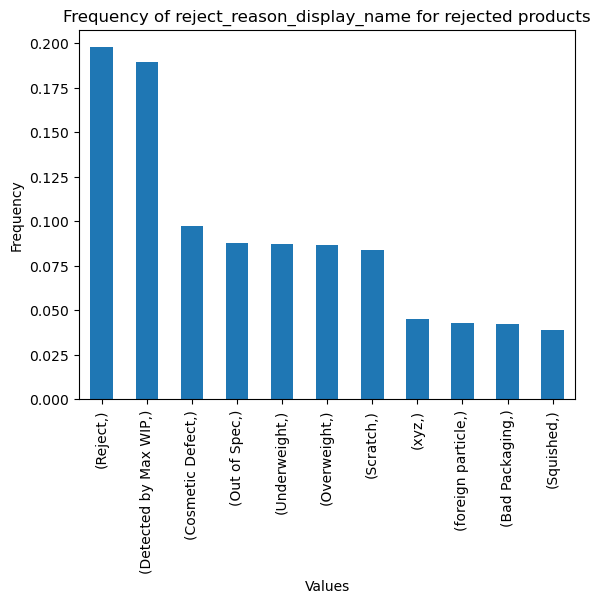

In [22]:
import matplotlib.pyplot as plt
(reject_reasons[['reject_reason_display_name']].value_counts()/reject_reasons.shape[0]).plot(kind='bar')
plt.title('Frequency of reject_reason_display_name for rejected products')
plt.xlabel('Values')
plt.ylabel('Frequency')

In [23]:


dfProductionMetric['run_time'] = dfProductionMetric[['end_time', 'start_time']].apply(lambda x: (pd.Timestamp(x['end_time']) - pd.Timestamp(x['start_time'])).total_seconds(), axis = 1)

In [24]:
dfProductionMetric[['deviceKey', 'good_count', 'run_time']].groupby('deviceKey').agg('sum')

,good_count,run_time
deviceKey,,
Line1,380662,1.063912e+06
Line2,183279,-8.518310e+07
Line3,333059,1.066076e+06
Line4,362925,1.063927e+06


In [25]:
dfProductionMetric_filtered = dfProductionMetric[dfProductionMetric.run_time > 0]

In [26]:
dfProdAgg = dfProductionMetric_filtered[['deviceKey', 'good_count', 'run_time']].groupby('deviceKey').agg('sum')

In [27]:
dfProdAgg['good_per_run_time'] = dfProdAgg['good_count']/dfProdAgg['run_time']
dfProdAgg

,good_count,run_time,good_per_run_time
deviceKey,,,
Line1,380662,1.063912e+06,0.357795
Line2,183279,1.201229e+06,0.152576
Line3,333059,1.066076e+06,0.312416
Line4,362925,1.063927e+06,0.341118


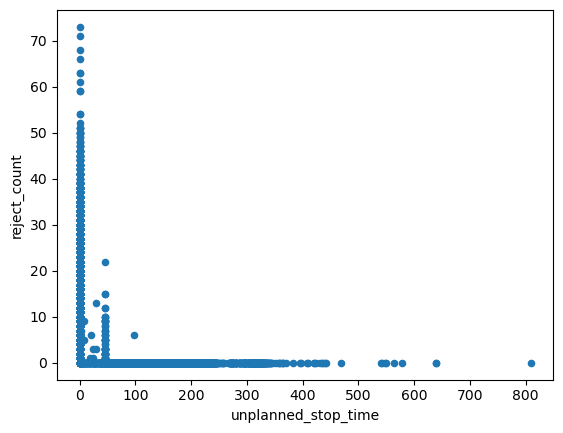

In [28]:
dfProductionMetric_filtered[['unplanned_stop_time', 'reject_count']].plot.scatter(x='unplanned_stop_time', y='reject_count')
plt.show()

<Axes: xlabel='unplanned_stop_time', ylabel='reject_count'>

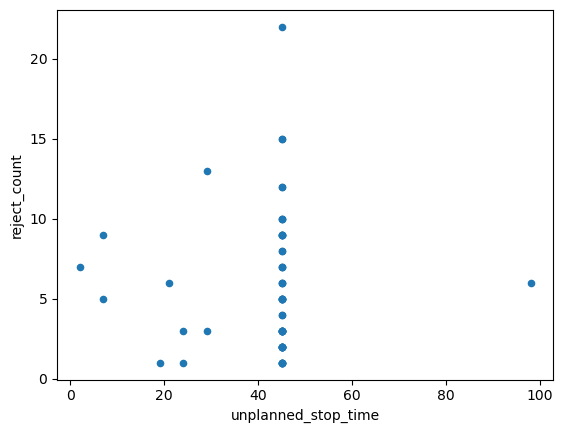

In [29]:
dfProductionMetric_filtered_v2 = dfProductionMetric_filtered[(dfProductionMetric_filtered.unplanned_stop_time > 0) & (dfProductionMetric_filtered.reject_count > 0) ]
dfProductionMetric_filtered_v2[['unplanned_stop_time', 'reject_count']].plot.scatter(x='unplanned_stop_time', y='reject_count')


In [30]:
dfProductionMetric_filtered

,prodmetric_stream_key,deviceKey,start_time,end_time,good_count,reject_count,ideal_time,run_time,unplanned_stop_time,planned_stop_time,unplanned_stop_time.1,performance_impact_display_name,process_state_display_name,process_state_reason_display_name,job_display_name,part_display_name,shift_display_name,team_display_name
0,5552062,Line3,2025-01-29 19:10:14.3284760 -06:00,2025-01-29 19:13:19.6285480 -06:00,0,0,0.000000,185.300072,185.300072,0.0,185.300072,Unplanned Stop,Down,Security Alarm,Part D-4000,Part D,Second Shift,Team 2
1,5552060,Line3,2025-01-29 19:05:37.3369440 -06:00,2025-01-29 19:10:14.3284760 -06:00,96,0,157.363822,276.991532,0.000000,0.0,0.000000,Run,Running,Running Normally,Part D-4000,Part D,Second Shift,Team 2
2,5552046,Line4,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:02:07.0000000 -06:00,54,0,0.000000,127.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part J-4000,Part J,Second Shift,Team 3
3,5552048,Line2,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:34.0000000 -06:00,0,0,0.000000,94.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part M-3000,Part M,Second Shift,Team 3
4,5552049,Line1,2025-01-29 19:00:00.0000000 -06:00,2025-01-29 19:01:52.0000000 -06:00,67,0,0.000000,112.000000,0.000000,0.0,0.000000,Not Scheduled,Meal/Break,Lunch,Part P-2000,Part P,Second Shift,Team 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5420551,Line3,2025-01-17 11:26:05.5650680 -06:00,2025-01-17 11:29:11.4843000 -06:00,0,0,0.000000,185.919232,185.919232,0.0,185.919232,Unplanned Stop,Down,No Bottles,Part F-3000,Part F,First Shift,Team 1
9996,5420547,Line3,2025-01-17 11:19:12.1559110 -06:00,2025-01-17 11:26:05.5650680 -06:00,210,16,372.159850,413.409157,0.000000,0.0,0.000000,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1
9997,5420543,Line3,2025-01-17 11:16:22.5533940 -06:00,2025-01-17 11:19:12.1559110 -06:00,0,0,0.000000,169.602517,169.602517,0.0,169.602517,Unplanned Stop,Down,Random Inspection,Part F-3000,Part F,First Shift,Team 1
9998,5420541,Line3,2025-01-17 11:15:00.0000000 -06:00,2025-01-17 11:16:22.5533940 -06:00,13,10,37.762533,82.553394,0.000000,0.0,0.000000,Run,Running,Running Normally,Part F-3000,Part F,First Shift,Team 1


In [31]:
dfProductionMetric_filtered[['unplanned_stop_time', 'shift_display_name']].groupby('shift_display_name').agg('mean')

,unplanned_stop_time
shift_display_name,
First Shift,48.058677
No Shift,0.000000
Second Shift,46.969538
Third Shift,48.223790
Unknown Shift,0.000000


In [32]:
dfProductionMetric_filtered[['unplanned_stop_time', 'team_display_name']].groupby('team_display_name').agg('mean')

,unplanned_stop_time
team_display_name,
No Team,15.171864
Team 1,50.011847
Team 2,48.161330
Team 3,48.128512
Unknown Team,0.000000


In [34]:
dfProductionMetric_filtered[['reject_count', 'team_display_name']].groupby('team_display_name').agg('mean')

,reject_count
team_display_name,
No Team,0.061224
Team 1,5.072311
Team 2,4.976737
Team 3,4.885360
Unknown Team,0.000000
